In [1]:
#Avinash Sookram
#CMPSC 445
#Project 2

In [2]:
from PIL import Image, ImageOps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

In [3]:
'''

General schema of this project

Have a list of photos in a directory

Create a general pixel map storing array

For-loop through the directory to calculate the individual pixel maps and store them in the array

Output the variables in the final iteration to show it working

Break from for-loop, calculate the average matrix

Calculate the covariance matrix/eigenvalues/eigenvectors using average matrix and one of the faces

Have a separate test image on hand

Calculate vectors of this face and subtract with the average vector from before.

Project the image with the eigenspace

Calculate Euclidian distance (e)

If e < threshold, e is a recognized face (i)



'''

'\n\nGeneral schema of this project\n\nHave a list of photos in a directory\n\nCreate a general pixel map storing array\n\nFor-loop through the directory to calculate the individual pixel maps and store them in the array\n\nOutput the variables in the final iteration to show it working\n\nBreak from for-loop, calculate the average matrix\n\nCalculate the covariance matrix/eigenvalues/eigenvectors using average matrix and one of the faces\n\nHave a separate test image on hand\n\nCalculate vectors of this face and subtract with the average vector from before.\n\nProject the image with the eigenspace\n\nCalculate Euclidian distance (e)\n\nIf e < threshold, e is a recognized face (i)\n\n\n\n'

In [4]:
list_of_faces = ['face1.jpg', 'face2.jpg', 'face3.jpg', 'face4.jpg', 'face5.jpg', 'face6.jpg', 'face7.jpg', 'face8.jpg', 'face9.jpg', 'face10.jpg']

In [5]:
pixel_maps = []
counter = 0

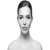

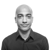

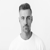

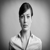

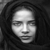

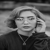

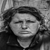

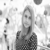

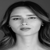

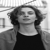

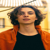

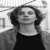

[array([255, 255, 255, ..., 255, 255, 255]), array([255, 255, 255, ...,  44,  96, 250]), array([244, 246, 245, ..., 235, 235, 232]), array([60, 63, 65, ..., 71, 68, 65]), array([138, 115,  85, ...,  17,  16,  15]), array([13, 12, 13, ..., 41, 52, 37]), array([149, 139, 164, ...,  66,  73, 109]), array([244, 244, 244, ..., 170, 158, 174]), array([ 76,  76,  76, ..., 127, 118, 111]), array([221, 252, 229, ..., 102,  95,  86])]


In [6]:
for image in list_of_faces:
    
    img = Image.open(image) #placeholder for img
    
    img = img.resize((50,50)) #resize img with 50 by 50 size
    
    img_grayscale = ImageOps.grayscale(img) #ImageOps part of PIL, easily grayscale
    
    pixelMap = img_grayscale.load()
    
    new_image = Image.new(img_grayscale.mode, img_grayscale.size)# Recreate image with pixelMap to ensure correctness
    new_image.putdata([pixelMap[x, y] for y in range(img_grayscale.size[1]) for x in range(img_grayscale.size[0])])
    display(new_image)
    
    
    T = np.array([pixelMap[i, j] for j in range(img_grayscale.size[1]) for i in range(img_grayscale.size[0])])
    #Below code gets numerical pixel map values printed, T converts it to 1D vector
    '''
    for i in range(img_grayscale.size[0]): # loop over columns
        for j in range(img_grayscale.size[1]): # loop over rows
            print(pixelMap[i, j], end=" ") # print the pixel value, to show pixelMap
        print() # print a newline at the end of each row
    
    print(T)
    print(T.shape[0])
    '''
    
    pixel_maps.append(T) #add the vector to pixel_map array
    
    if counter == len(list_of_faces) - 1: #shows the last image being processed
        display(img)
        display(img_grayscale)
        #print(pixel_maps)
    else:
        counter += 1
print(pixel_maps)

In [7]:
X = np.vstack(pixel_maps) # Convert the list of pixel maps to a numpy matrix
print(X.shape)
X_transposed = X.T
print(X_transposed.shape)

(10, 2500)
(2500, 10)


array([165.5, 165.7, 163.1, ..., 112.8, 116.6, 133.4])

(2500, 1)

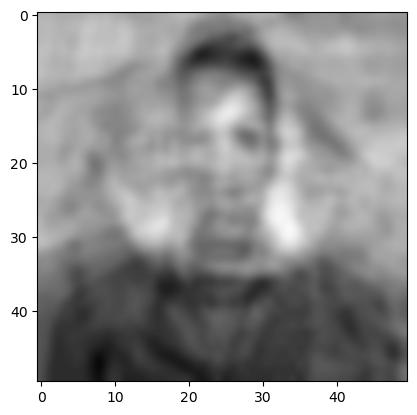

In [8]:
mean_image = np.mean(X_transposed, axis=1) # Calculate the mean image
display(mean_image) #display array of the mean image
mean_image = mean_image.reshape((2500, 1)) #rehsape to (2500,1) instead of (2500,)
display(mean_image.shape) #show shape
mean_face = mean_image.reshape((50, 50)) #resize to (50,50)
plt.imshow(mean_face, cmap='gray',  interpolation = 'bicubic', origin = 'upper') #use plt to show the mean face
plt.show()

[array([ 89.5,  89.3,  91.9, ..., 142.2, 138.4, 121.6]), array([ 89.5,  89.3,  91.9, ..., -68.8, -20.6, 116.6]), array([ 78.5,  80.3,  81.9, ..., 122.2, 118.4,  98.6]), array([-105.5, -102.7,  -98.1, ...,  -41.8,  -48.6,  -68.4]), array([ -27.5,  -50.7,  -78.1, ...,  -95.8, -100.6, -118.4]), array([-152.5, -153.7, -150.1, ...,  -71.8,  -64.6,  -96.4]), array([-16.5, -26.7,   0.9, ..., -46.8, -43.6, -24.4]), array([78.5, 78.3, 80.9, ..., 57.2, 41.4, 40.6]), array([-89.5, -89.7, -87.1, ...,  14.2,   1.4, -22.4]), array([ 55.5,  86.3,  65.9, ..., -10.8, -21.6, -47.4])]
(2500,)


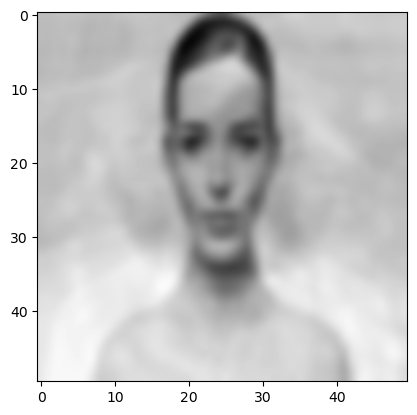

(2500,)


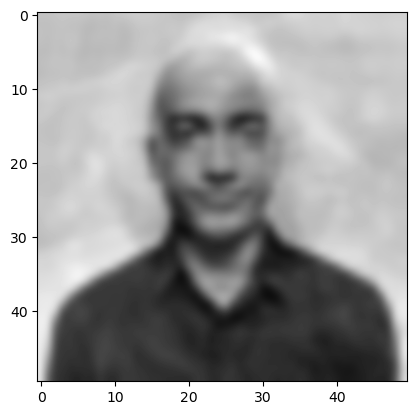

(2500,)


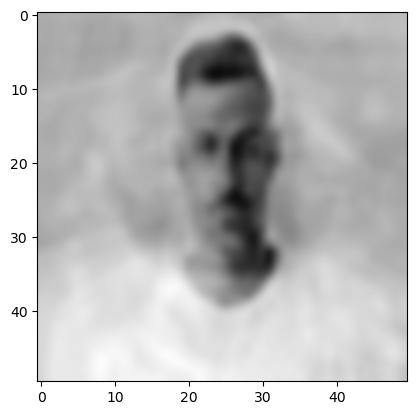

(2500,)


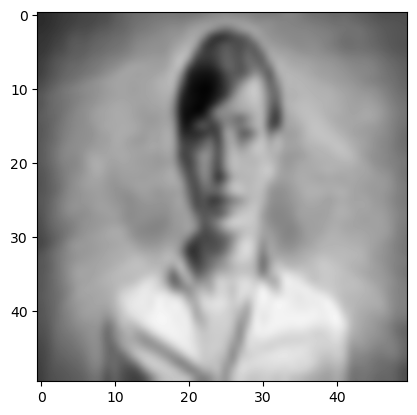

(2500,)


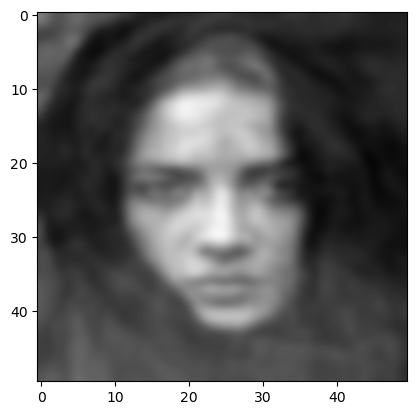

(2500,)


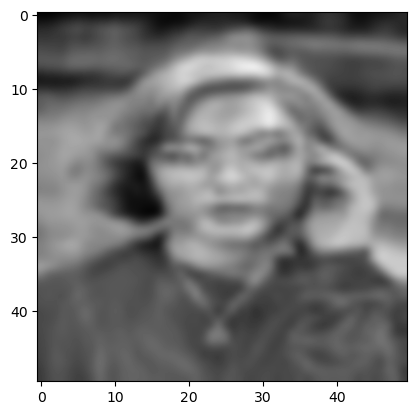

(2500,)


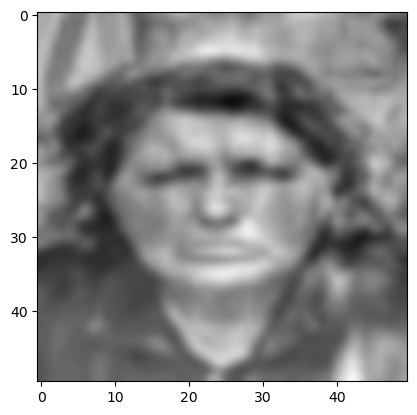

(2500,)


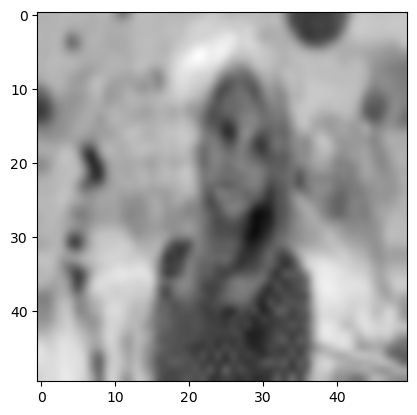

(2500,)


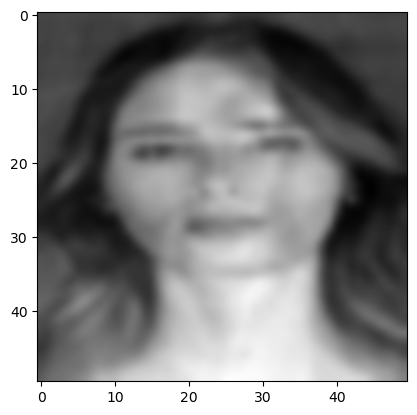

(2500,)


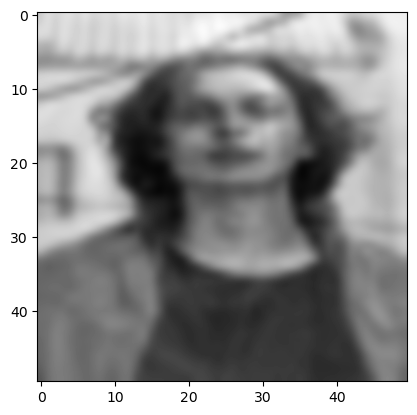

(10, 2500)

array([[ 89.5,  89.3,  91.9, ..., 142.2, 138.4, 121.6],
       [ 89.5,  89.3,  91.9, ..., -68.8, -20.6, 116.6],
       [ 78.5,  80.3,  81.9, ..., 122.2, 118.4,  98.6],
       ...,
       [ 78.5,  78.3,  80.9, ...,  57.2,  41.4,  40.6],
       [-89.5, -89.7, -87.1, ...,  14.2,   1.4, -22.4],
       [ 55.5,  86.3,  65.9, ..., -10.8, -21.6, -47.4]])

In [21]:
subtracted_avg_faces = [] #store each column, represented of one image, use original untransposed matrix
mean_image = mean_image.ravel() #convs to (2500,1)
for column in X: #each column is an image 
    difference_vector = column - mean_image # Subtract the mean image from the face vector
    subtracted_avg_faces.append(difference_vector)

print(subtracted_avg_faces)
for face in subtracted_avg_faces:
    print(face.shape)
    plt.imshow(face.reshape((50,50)), cmap = 'gray', interpolation = 'bicubic', origin = 'upper')
    plt.show()
    
difference_vectors = np.array(subtracted_avg_faces)
display(difference_vectors.shape, difference_vectors)

In [22]:
cov_matrix = np.cov(difference_vectors) # Calculate the covariance matrix between the mean image and the difference vector
display(cov_matrix)
display(cov_matrix.shape)

array([[ 2143.86314282,  -506.97141349,  1283.45778307,   364.89291072,
        -1124.93614266,  -633.67222637,  -829.79105198,   179.23541044,
         -344.2168467 ,  -531.86156587],
       [ -506.97141349,  4962.24609888,  -760.33457555, -1289.92372641,
        -1979.39720748,   277.10664702,  -442.56360652,   957.78794722,
        -3468.51439604,  2250.56423237],
       [ 1283.45778307,  -760.33457555,  2008.48949416,   579.90995994,
        -1026.62488615,  -839.41488263,  -616.81126246,   296.01295266,
         -222.3078615 ,  -702.37672153],
       [  364.89291072, -1289.92372641,   579.90995994,  2552.05273065,
         -374.46565446,  -217.64588383,  -360.57908319,  -682.78160836,
          918.71857147, -1490.17821653],
       [-1124.93614266, -1979.39720748, -1026.62488615,  -374.46565446,
         3477.76009104,   270.58438635,   660.77452401,  -989.08477651,
         2457.65727511, -1372.26760924],
       [ -633.67222637,   277.10664702,  -839.41488263,  -217.64588383,
   

(10, 10)

In [23]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) # Calculate the eigenvalues and eigenvectors of the covariance matrix
display(eigenvalues, eigenvalues.shape)
display(eigenvectors, eigenvectors.shape)

array([1.31245403e+04, 6.05200566e+03, 2.23741474e-12, 2.82478458e+03,
       2.47107372e+03, 1.80795072e+03, 1.68867687e+03, 6.94779778e+02,
       9.82039593e+02, 1.09806030e+03])

(10,)

array([[-0.00736076,  0.47708495, -0.31622777, -0.14560355, -0.0649746 ,
         0.31918131,  0.29941609,  0.55605892, -0.36656005, -0.10871607],
       [-0.51208885, -0.15504432, -0.31622777,  0.52648365,  0.13029681,
         0.47153054, -0.26642362, -0.02809445,  0.04482684, -0.15310989],
       [ 0.01974615,  0.48367703, -0.31622777, -0.20222329, -0.08751756,
         0.13327262, -0.03722872, -0.76749278, -0.05897995, -0.07376762],
       [ 0.17682678,  0.32867941, -0.31622777,  0.23595681,  0.5024276 ,
        -0.52768324, -0.20891052,  0.15168125,  0.19286232, -0.26513534],
       [ 0.33611524, -0.44011185, -0.31622777, -0.07092395, -0.343118  ,
        -0.01619043,  0.03981847, -0.01780107, -0.02347888, -0.68399719],
       [-0.00692365, -0.19843019, -0.31622777,  0.43403823, -0.03068704,
        -0.32803544,  0.55386797, -0.19041479, -0.3628227 ,  0.29828101],
       [ 0.05452154, -0.26393364, -0.31622777, -0.30822435,  0.10509306,
        -0.09736484, -0.57764088,  0.05685204

(10, 10)

In [24]:
# Sort the eigenvalues in descending order and select the top k eigenvectors
k = 1  # number of eigenvectors to select
idx = eigenvalues.argsort()[::-1]
top_k_eigenvectors = eigenvectors[:, idx][:, :k]

# Print the top k eigenvectors
print(top_k_eigenvectors)
top_k_eigenvectors.shape

[[-0.00736076]
 [-0.51208885]
 [ 0.01974615]
 [ 0.17682678]
 [ 0.33611524]
 [-0.00692365]
 [ 0.05452154]
 [-0.21805984]
 [ 0.59346582]
 [-0.43624242]]


(10, 1)

(2500, 1)

(2500, 1)

(2500, 10)

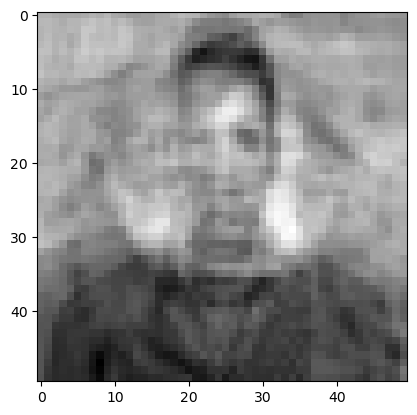

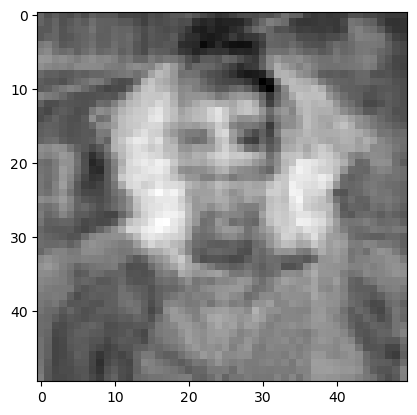

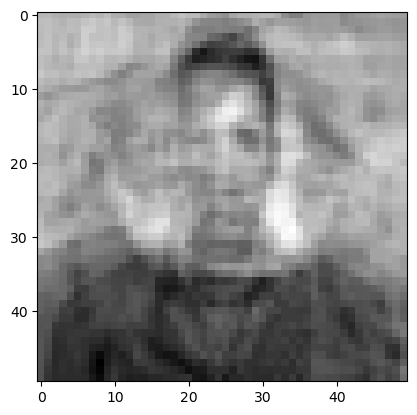

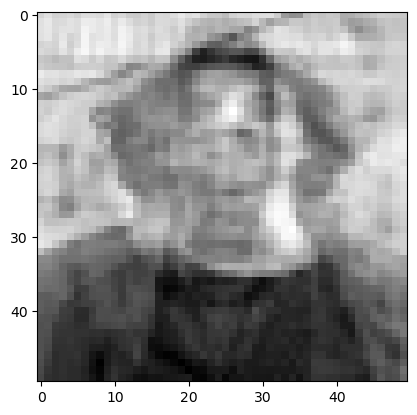

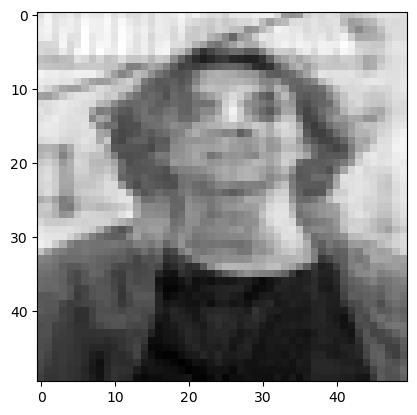

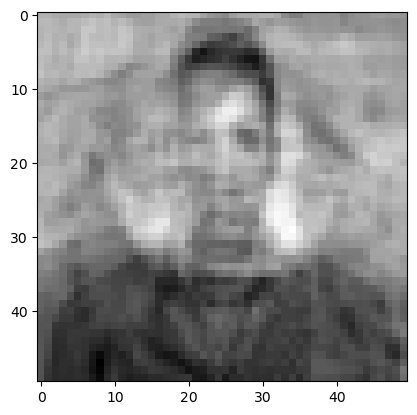

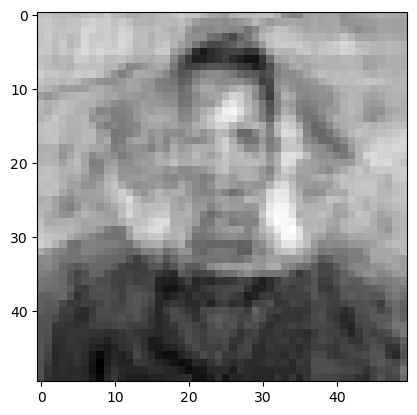

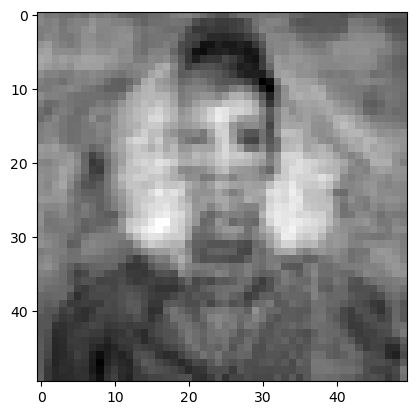

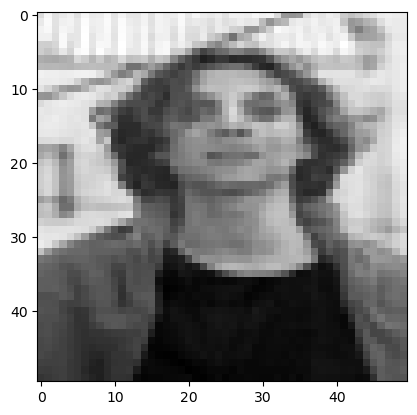

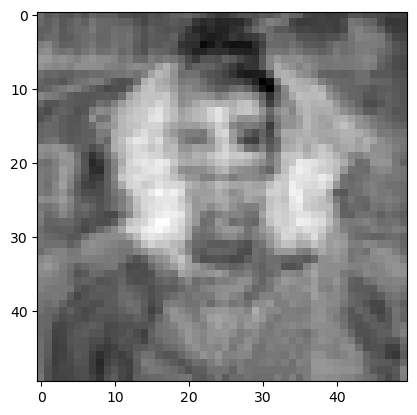

In [25]:
# Reshape the mean image to have shape (2500, 1)
mean_image_reshaped = mean_image.reshape(-1, 1)
display(mean_image_reshaped.shape)

difference_reshaped = difference_vector.reshape(-1, 1)
display(difference_reshaped.shape)

#To reconstruct the original face vector, take the transpose of the difference vector
#Difference_Reshaped = (2500, 1)
#Top_k_Eigenvectors = (10, 1)
#Need the ones on the outside

#test = np.dot(top_k_eigenvectors, difference_reshaped) #returns: ValueError: shapes (10,1) and (2500,1) not aligned: 1 (dim 1) != 2500 (dim 0)
#print(test)


diff_transposed = difference_reshaped.T #(1, 2500)
top_k_eigenvectors_transposed = top_k_eigenvectors.T #(1, 2)

difference_with_eigen = np.dot(difference_reshaped, top_k_eigenvectors_transposed) #(2500,1) x (1, 10)
#display(test3.shape) #(2500, 10)

reconstructed_face_vectors = mean_image_reshaped + difference_with_eigen
display(reconstructed_face_vectors.shape) #(2500,10)
#print(reshaped_face.shape)

for i in np.transpose(reconstructed_face_vectors): #use transpose as the transpose of the reconstructed face vectors can allow rows to be made into images easier
    plt.imshow((i.reshape(50,50)), cmap = 'gray')
    plt.show()



In [26]:
'''
Logic for test case:

Use the sample face

Resize (50,50)

Get grayscale

Convert the image into a single row vector 

plot the image 

Subtract the mean_image vector from this face, plot the image

After plotting the image using it as a 1D vector, subtract the mean_vector from the test sample vector.

Then, do np.transpose(result of last line) and dot product it with the results from the training set to find the Eigen face space.

Finally, calculate the Euclidian distance by np.argmin(np.linalg.norm(eigen_space_face - weight)), with weight = np.transpose(differences).dot(original results)
'''

'\nLogic for test case:\n\nUse the sample face\n\nResize (50,50)\n\nGet grayscale\n\nConvert the image into a single row vector \n\nplot the image \n\nSubtract the mean_image vector from this face, plot the image\n\nAfter plotting the image using it as a 1D vector, subtract the mean_vector from the test sample vector.\n\nThen, do np.transpose(result of last line) and dot product it with the results from the training set to find the Eigen face space.\n\nFinally, calculate the Euclidian distance by np.argmin(np.linalg.norm(eigen_space_face - weight)), with weight = np.transpose(differences).dot(original results)\n'

In [27]:
tstimg = Image.open('sample_face.jpg')

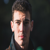

In [28]:
tstimg = tstimg.resize((50,50))
display(tstimg)

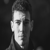

In [29]:
tstimg_gray = ImageOps.grayscale(tstimg)
display(tstimg_gray)

In [30]:
tstpixelMap = tstimg_gray.load()
T = np.array([tstpixelMap[i, j] for j in range(tstimg_gray.size[1]) for i in range(tstimg_gray.size[0])])
display(T)
display(T.shape)

array([26, 26, 27, ..., 20, 20, 20])

(2500,)

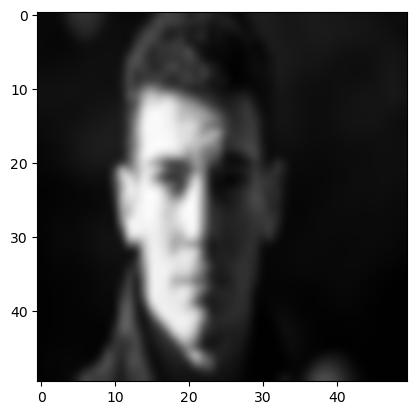

In [31]:
plt.imshow(np.reshape(T, (50,50)), cmap = 'gray', interpolation = 'bicubic', origin = 'upper')

(2500,)

array([-139.5, -139.7, -136.1, ...,  -92.8,  -96.6, -113.4])

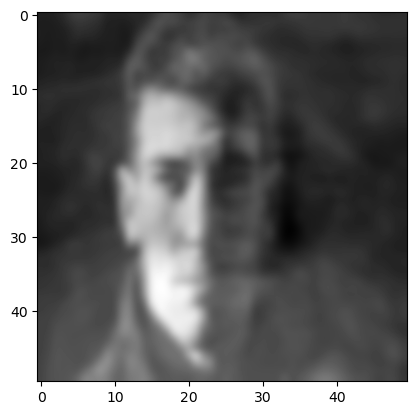

In [32]:
subtracted_avg_test = T - mean_image
reshaped_subtracted_avg_test = subtracted_avg_test.reshape((50, 50))
display(subtracted_avg_test.shape, subtracted_avg_test)
plt.imshow(reshaped_subtracted_avg_test, cmap = 'gray', interpolation = 'bicubic', origin = 'upper')

In [33]:
eigen_space_face = np.transpose(subtracted_avg_test).dot(difference_with_eigen)
display(eigen_space_face.shape, eigen_space_face)

(10,)

array([  -3716.87631464, -258583.3973623 ,    9970.97531772,
         89290.10741858,  169724.10088749,   -3496.15206903,
         27531.09273327, -110111.07543862,  299675.35534872,
       -220284.13052117])

In [34]:
eigen_space_face = np.transpose(eigen_space_face)
weight = np.transpose(difference_reshaped).dot(difference_with_eigen)
display(eigen_space_face.shape, eigen_space_face)
display(weight.shape, weight)

(10,)

array([  -3716.87631464, -258583.3973623 ,    9970.97531772,
         89290.10741858,  169724.10088749,   -3496.15206903,
         27531.09273327, -110111.07543862,  299675.35534872,
       -220284.13052117])

(1, 10)

array([[  -90083.82184531, -6267139.05124225,   241660.87007159,
         2164073.65979691,  4113506.71179647,   -84734.25356921,
          667255.47019668, -2668699.6454331 ,  7263061.51654962,
        -5338901.4563214 ]])

In [35]:
euclidean_distance = np.argmin(np.linalg.norm(eigen_space_face - weight, axis=0))
display(euclidean_distance)

5

In [36]:
best_match = np.argmin(euclidean_distance)
display(best_match)

0